In [1]:
import sys
import pandas as pd
import numpy as np
import glob

import warnings
warnings.filterwarnings('ignore')
sys.path.append("../Moduulit/modules")
sys.path.append("../Datat/Mittaukset")
sys.path.append("../Datat/koskemattomat_csv")
sys.path.append("../Datat/csv")

### Luodataan dataseteille omat dataloaderit

In [2]:
from dataloaders import dataloaders

In [3]:
train_loader, test_loader, val_loader, large_test_loader= dataloaders('../Datat/csv/', False, True)

-------------------------------------------------------------
------------------ Creating Dataloaders ---------------------
-------------------------------------------------------------


Reading csv-files from ../Datat/csv//

Dataloaders:
train_loader: 6363 
test_loader: 1833 
val_loader: 1837 
large_test_loader: 10032


Done in 1.64 seconds.


### Luodaan ja koulutetaan verkko

#### Regressiomalli

In [4]:
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt

In [5]:
model = nn.Sequential(nn.Linear(8, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Linear(32,1))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1/2.. Step 800.. Train loss: 81.351.. Test loss: 0.226.. Test accuracy: 0.000
Epoch 1/2.. Step 1600.. Train loss: 0.100.. Test loss: 0.085.. Test accuracy: 0.000
Epoch 1/2.. Step 2400.. Train loss: 0.070.. Test loss: 0.072.. Test accuracy: 0.000
Epoch 1/2.. Step 3200.. Train loss: 0.065.. Test loss: 0.124.. Test accuracy: 0.000
Epoch 1/2.. Step 4000.. Train loss: 0.073.. Test loss: 0.180.. Test accuracy: 0.000
Epoch 1/2.. Step 4800.. Train loss: 0.087.. Test loss: 0.161.. Test accuracy: 0.000
Epoch 1/2.. Step 5600.. Train loss: 0.085.. Test loss: 0.071.. Test accuracy: 0.000
Epoch 2/2.. Step 6400.. Train loss: 0.094.. Test loss: 0.049.. Test accuracy: 0.000
Epoch 2/2.. Step 7200.. Train loss: 0.081.. Test loss: 0.165.. Test accuracy: 0.000
Epoch 2/2.. Step 8000.. Train loss: 0.085.. Test loss: 0.206.. Test accuracy: 0.000
Epoch 2/2.. Step 8800.. Train loss: 0.087.. Test loss: 0.114.. Test accuracy: 0.000
Epoch 2/2.. Step 9600.. Train loss: 0.082.. Test loss: 0.054.. Test accuracy

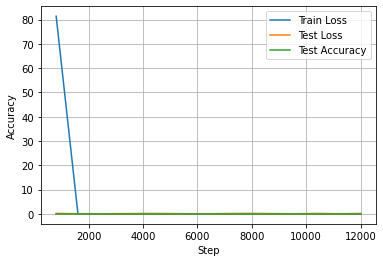

Haluatko tallentaa mallin? (y/n) n


model not saved
Done


112.51108932495117

In [6]:
from neuroverkkomodel import *
import time
start = time.time()
neuroverkkoregressio(model, 2, optimizer, criterion, train_loader, val_loader)
time.time()-start

### Testataan, kuinka hyvin malli toimii testloaderin datalle.

In [7]:
# model =torch.load("10epoch.pth") # Valmiiksi koulutetun mallin voi ladata kayttöön

preds = []
targ = []

with torch.no_grad():
    for inputs, targets in test_loader:
        preds.append(model(inputs.float()))
        targ.append(targets)

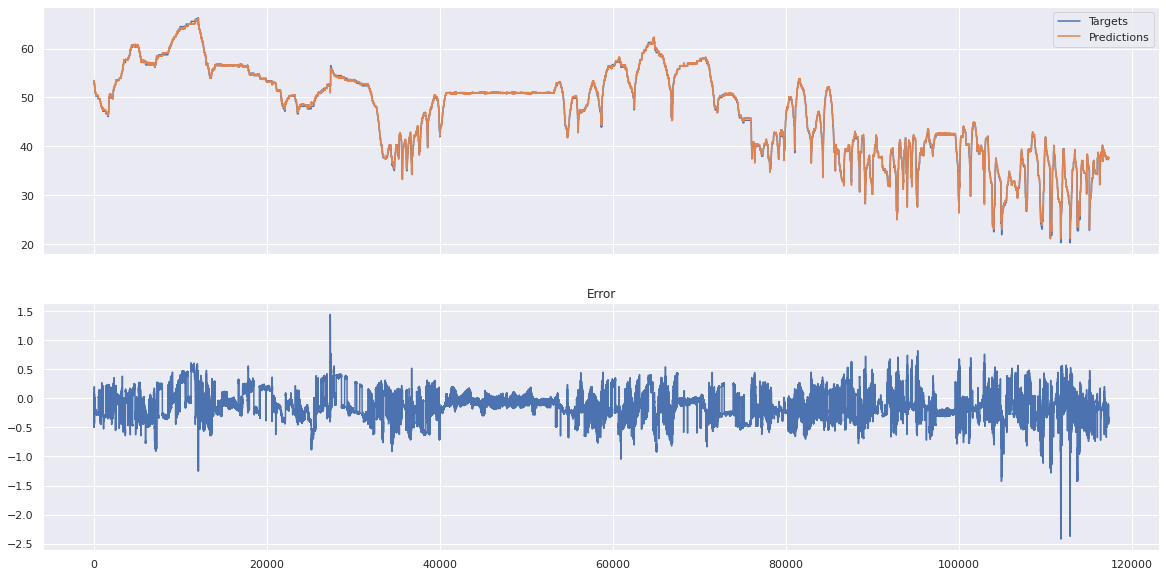

In [8]:
flat_targ = []
for sublist in targ:
    for item in sublist:
        flat_targ.append(item)
        
flat_preds = []
for sublist in preds:
    for item in sublist:
        flat_preds.append(item)
        
        
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))
ax1.plot(flat_targ,label="Targets");
ax1.plot(flat_preds, label="Predictions");
ax1.legend()
ax2.plot(np.array(np.array(flat_targ) - np.array(flat_preds)));
ax2.set_title("Error");

plt.show();

In [11]:
# Virheen keskihajonta
erotus = np.array(np.array(flat_targ) - np.array(flat_preds))
np.std(erotus)

0.24100351307110793

In [12]:
# suurin poitiivinen virhe
np.max(erotus)

1.4435533142089838

In [13]:
# Suurin negatiivinen virhe
np.min(erotus)

-2.420580444335936